# Flipkart is an online shopping website with a lot of ongoing sales. This notebook is an Exploratory Data Analysis for the platform with some additional image processing.

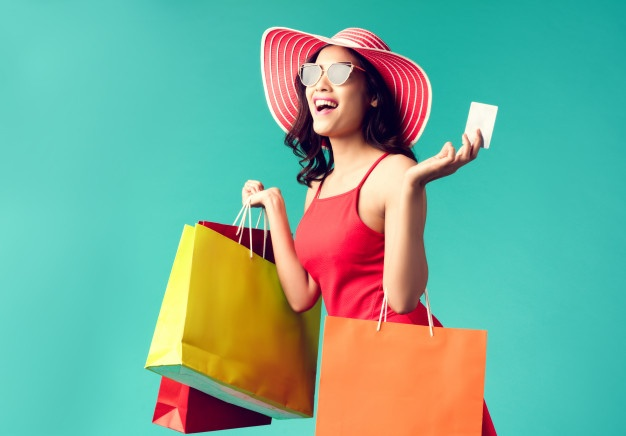

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [3]:
womens_western=pd.read_csv("/kaggle/input/flipkart-data/flipkart_data/women_westernwear.csv")
mens_western=pd.read_csv("/kaggle/input/flipkart-data/flipkart_data/mens_westernwear.csv")
laptops=pd.read_csv("/kaggle/input/flipkart-data/flipkart_data/laptops.csv")
mobs=pd.read_csv("/kaggle/input/flipkart-data/flipkart_data/mobiles.csv")
baby=pd.read_csv("/kaggle/input/flipkart-data/flipkart_data/baby.csv")
food=pd.read_csv("/kaggle/input/flipkart-data/flipkart_data/food.csv")
footwear=pd.read_csv("/kaggle/input/flipkart-data/flipkart_data/women_footwear.csv")
furni=pd.read_csv("/kaggle/input/flipkart-data/flipkart_data/furn.csv")
books=pd.read_csv("/kaggle/input/flipkart-data/flipkart_data/books.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/flipkart-data/flipkart_data/women_westernwear.csv'

In [4]:
womens_western.head(5)

,Product Name,Price,Original Prices,Discount rates,Brand,Image URLS
0,Skinny Women Grey Jeans,714,"1,499",52% off,Flying Machine,https://rukminim1.flixcart.com/image/329/395/k...
1,Printed Women Round Neck White T-Shirt,499,999,50% off,Pepe Jeans,https://rukminim1.flixcart.com/image/329/395/k...
2,Casual Roll-up Sleeve Solid Women Dark Blue Top,260,999,73% off,KURTI WORLD,https://rukminim1.flixcart.com/image/329/395/k...
3,Skinny Women Light Blue Jeans,399,"1,599",75% off,BuyNewTrend,https://rukminim1.flixcart.com/image/329/395/j...
4,"Printed, Striped Women White, Black Regular Sh...",199,399,50% off,pdpm,https://rukminim1.flixcart.com/image/329/395/j...


In [5]:
laptops.head()

,Product Name,Price,Original Prices,Discount rates,Ratings
0,Dell 14 3000 Core i3 7th Gen - (4 GB/1 TB HDD/...,"26,990","29,575",8% off,4.1
1,HP Pavilion Core i5 9th Gen - (8 GB/1 TB HDD/W...,"52,990","66,041",19% off,4.2
2,HP 15s Ryzen 3 Dual Core - (4 GB/256 GB SSD/Wi...,"30,990","32,598",4% off,4.5
3,HP 15 Pentium Gold - (4 GB/1 TB HDD/Windows 10...,"24,990","25,556",2% off,4.4
4,Lenovo Ideapad S145 APU Dual Core A6 - (4 GB/1...,"20,990","22,392",6% off,4.0


# Data Cleaning

The raw data has commas and fillers like '% off'. Therefore, the data ought to be cleaned.

In [6]:
laptops['Price']=laptops['Price'].str.replace(',','')
laptops['Original Prices']=laptops['Original Prices'].str.replace(',','')
laptops['Discount rates']=laptops['Discount rates'].str.replace('% off','')

In [7]:
womens_western['Price']=womens_western['Price'].str.replace(',','')
womens_western['Original Prices']=womens_western['Original Prices'].str.replace(',','')
womens_western['Discount rates']=womens_western['Discount rates'].str.replace('% off','')

In [8]:
mens_western['Price']=mens_western['Price'].str.replace(',','')
mens_western['Original Prices']=mens_western['Original Prices'].str.replace(',','')
mens_western['Discount rates']=mens_western['Discount rates'].str.replace('% off','')

In [9]:
mobs['Price']=mobs['Price'].str.replace(',','')
mobs['Original Prices']=mobs['Original Prices'].str.replace(',','')
mobs['Discount rates']=mobs['Discount rates'].str.replace('% off','')

In [10]:
baby['Price']=baby['Price'].str.replace(',','')
baby['Original Prices']=baby['Original Prices'].str.replace(',','')
baby['Discount rates']=baby['Discount rates'].str.replace('% off','')

In [11]:
food['Price']=food['Price'].str.replace(',','')
food['Original Prices']=food['Original Prices'].str.replace(',','')
food['Discount rates']=food['Discount rates'].str.replace('% off','')

In [12]:
footwear['Price']=footwear['Price'].str.replace(',','')
footwear['Original Prices']=footwear['Original Prices'].str.replace(',','')
footwear['Discount rates']=footwear['Discount rates'].str.replace('% off','')

In [13]:
furni['Price']=furni['Price'].str.replace(',','')
furni['Original Prices']=furni['Original Prices'].str.replace(',','')
furni['Discount rates']=furni['Discount rates'].str.replace('% off','')

In [14]:
books['Price']=books['Price'].str.replace(',','')
books['Original Prices']=books['Original Prices'].str.replace(',','')
books['Discount rates']=books['Discount rates'].str.replace('% off','')

# Visualizing data

In [15]:
books_nona=books.dropna()
furni_nona=furni.dropna()
baby_nona=baby.dropna()

In [16]:
laptops_nona=laptops.dropna()
footwear_nona=footwear.dropna()
womens_western_nona=womens_western.dropna()
food_nona=food.dropna()
mobs_nona=mobs.dropna()
mens_western_nona=mens_western.dropna()


In [17]:
laptops_nona = laptops_nona[~laptops_nona['Discount rates'].isin(['Nan'])]
footwear_nona = footwear_nona[~footwear_nona['Discount rates'].isin(['Nan'])]
food_nona = food_nona[~food_nona['Discount rates'].isin(['Nan'])]
mobs_nona = mobs_nona[~mobs_nona['Discount rates'].isin(['Nan'])]
baby_nona = baby_nona[~baby_nona['Discount rates'].isin(['Nan'])]
furni_nona = furni_nona[~furni_nona['Discount rates'].isin(['Nan'])]
books_nona = books_nona[~books_nona['Discount rates'].isin(['Nan'])]

In [18]:
womens_western_nona['Discount rates']=womens_western_nona['Discount rates'].astype(str).astype(int)
footwear_nona['Discount rates']=footwear_nona['Discount rates'].astype(str).astype(int)
food_nona['Discount rates']=food_nona['Discount rates'].astype(str).astype(int)
mobs_nona['Discount rates']=mobs_nona['Discount rates'].astype(str).astype(int)
baby_nona['Discount rates']=baby_nona['Discount rates'].astype(str).astype(int)
furni_nona['Discount rates']=furni_nona['Discount rates'].astype(str).astype(int)
books_nona['Discount rates']=books_nona['Discount rates'].astype(str).astype(int)
laptops_nona['Discount rates']=laptops_nona['Discount rates'].astype(str).astype(int)
mens_western_nona['Discount rates']=mens_western_nona['Discount rates'].astype(str).astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# Most Discounted Category

In [19]:
x=['womens_westernwear','mens_westernwear','furniture','books','baby_products','footwear','laptops','mobiles', 'food']
y=[womens_western_nona['Discount rates'].mean(),mens_western_nona['Discount rates'].mean(),furni_nona['Discount rates'].mean(),books_nona['Discount rates'].mean(),baby_nona['Discount rates'].mean(),footwear_nona['Discount rates'].mean(),laptops_nona['Discount rates'].mean(),mobs_nona['Discount rates'].mean(),food_nona['Discount rates'].mean()]

In [20]:
fig = go.Figure(data=[go.Bar(x=x, y=y)])
# Customize aspect
fig.update_traces(marker_color='rgb(255,160,122)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Discounts')
fig.show()

Hence, Womens western wear clothing has highest discount rates followed by Mens clothing. Note that laptops have a mere 15% discount rate.

# Men's Clothing VS Women's Clothing

In [21]:
womens_western_nona['Price']=womens_western_nona['Price'].astype(str).astype(int)
womens_western_nona['Original Prices']=womens_western_nona['Original Prices'].astype(str).astype(int)
mens_western_nona['Price']=mens_western_nona['Price'].astype(str).astype(int)
mens_western_nona['Original Prices']=mens_western_nona['Original Prices'].astype(str).astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [22]:
features=['Price','Original Prices','Discount rates']
fig = go.Figure(data=[
    go.Bar(name='Womens Clothing', x=features, y=[womens_western_nona['Price'].mean()
                                                  ,womens_western_nona['Original Prices'].mean()
                                                 ,womens_western_nona['Discount rates'].mean()]),
    go.Bar(name='Mens Clothing', x=features, y=[mens_western_nona['Price'].mean()
                                                  ,mens_western_nona['Original Prices'].mean()
                                                 ,mens_western_nona['Discount rates'].mean()])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

So, discount rates for both the categories are almost same. But original prices of women's clothing are evidently higher than that of men's.

# Priciest women's clothing items.

In [23]:
womens_western_top10=womens_western_nona.sort_values(by='Original Prices', ascending=False)
womens_western_top10.head(10)
cols=['Product Name','Image URLS']
womens_western_top10=womens_western_top10[cols].head(10)
womens_western_top10=womens_western_top10.set_index('Product Name')

In [24]:
womens_western_top10=womens_western_top10.rename(columns={"Image URLS": "img"})

In [25]:
from IPython.display import Image, HTML
def path_to_image_html(path):
    '''
     This function essentially convert the image url to 
     '<img src="'+ path + '"/>' format. And one can put any
     formatting adjustments to control the height, aspect ratio, size etc.
     within as in the below example. 
    '''

    return '<img src="'+ path + '"width="60" height="60""/>'

HTML(womens_western_top10.to_html(escape=False ,formatters=dict(img=path_to_image_html),justify='center'))

,img
Product Name,
Boot-Leg Women Beige Jeans,
Women Dark Blue Dungaree,
Full Sleeve Washed Women Jacket,
Super Skinny Women Blue Jeans,
Super Skinny Women Blue Jeans,
Super Skinny Women Blue Jeans,
Super Skinny Women Blue Jeans,
Super Skinny Women Blue Jeans,
Super Skinny Women Blue Jeans,


# Priciest Men's Clothing items

In [26]:
mens_top10=mens_western_nona.sort_values(by='Original Prices', ascending=False).head(10)
mens_top10=mens_top10[cols]
mens_top10=mens_top10.set_index('Product Name')
mens_top10=mens_top10.rename(columns={"Image URLS": "img"})

In [27]:
HTML(mens_top10.to_html(escape=False ,formatters=dict(img=path_to_image_html),justify='center'))

,img
Product Name,
"Solid Men Round Neck White, Grey T-Shirt",
Color Block Men Round Neck Multicolor T-Shirt,
"Solid Men Round Neck Red, White, Blue T-Shirt",
"Solid Men Round Neck White, Blue, Yellow T-Shirt",
"Color Block Men Round Neck White, Black, Grey T-Shirt",
"Solid Men Dark Blue, Grey Sports Shorts",
"Solid Men Dark Blue, Black, Grey Sports Shorts",
"Solid Men Black, Grey Sports Shorts",
"Solid Men Black, Grey Sports Shorts",


# Electronics

## Mobile data

In [28]:
mobs1=mobs.sort_values(by='Ratings', ascending=False)

In [29]:
top50=mobs1.head(50)
companies=['Apple','Redmi','Vivo','OnePlus','Realme','OPPO','POCO']
vals=[0,0,0,0,0,0,0]
dictionary=dict(zip(companies,vals))


In [30]:
for i in list(top50['Product Name']):
    for j in companies:
        if j in i:
            dictionary[j]+=1

In [31]:
import plotly.express as px
fig = px.pie(values=list(dictionary.values()), names=list(dictionary.keys()), color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Fascinatingly,Apple being one of the most pricey company of the mobile industry in India, is the top-rated company by users.

### Are discount rates responsible for ratings?

In [32]:
fig = px.line(mobs_nona, y="Discount rates", x="Ratings", title='Price VS Rating')
fig.show()

We can say that a mobile with higher discount tends to be rated less than the ratings that are given with average discount rates (30-40%). The mobile phone with 75% discount has received a mere rating of 2.7.

# Top brands

In [33]:
fig = px.treemap(mobs_nona, path=['Discount rates', 'Product Name'],color='Discount rates',values='Original Prices')
fig.show()

## Discount rates on laptops

In [34]:
laptops1=laptops_nona.sort_values(by='Discount rates', ascending=False)

In [35]:
laptops1

,Product Name,Price,Original Prices,Discount rates,Ratings
380,Avita Liber Core i5 7th Gen - (8 GB/256 GB SSD...,39990,75990,47,4.3
364,Acer Predator Triton 700 Core i7 7th Gen - (16...,99990,189999,47,3.0
8,Asus ZenBook Core i5 8th Gen - (8 GB/256 GB SS...,45990,86990,47,4.2
96,Lenovo Legion Y740 Core i7 9th Gen - (8 GB/1 T...,119990,207490,42,4.7
12,Lenovo Ideapad L340 Core i5 9th Gen - (8 GB/1 ...,59990,98990,39,4.5
...,...,...,...,...,...
335,Dell Inspiron 5000 Core i5 6th Gen - (8 GB/1 T...,67990,69000,1,3.8
316,Dell Core i3 6th Gen - (4 GB/1 TB HDD/Windows ...,45490,46000,1,4.0
177,Microsoft Surface Go Pentium Gold - (8 GB/128 ...,49999,50999,1,4.4
300,Dell Inspiron 15 5000 Core i5 8th Gen - (8 GB/...,76990,78000,1,4.4


In [36]:
import plotly.express as px
fig = px.histogram(laptops1, x="Discount rates",opacity=0.8,color_discrete_sequence=['indianred'])
fig.show()

Most laptops have a discount rate of 10-14%.

# Does price of the laptop affect user rating?

In [37]:
fig = px.bar(laptops_nona, y="Original Prices", x="Ratings", title='Price VS Rating', color='Original Prices')
fig.show()

Most common rating in laptops is a whopping 4.5 with a mix of laptop prices. Therefore,the price of a laptop does not have any relation whatsoever with the rating.

# Most expensive footwear brands

In [38]:
fig = px.treemap(footwear_nona, path=['Brand', 'Product Name'], values='Price')
fig.show()

Top most expensive footwear brands are: Puma, Nike,Action, Crocs, Sparx etc

### Most inexpensive footwear items

In [39]:
footwear_sorted=footwear_nona.sort_values(by='Price')

In [40]:
footwear_sorted=footwear_sorted.rename(columns={"Image URLS": "img"})
HTML(footwear_sorted.head(10).to_html(escape=False ,formatters=dict(img=path_to_image_html),justify='center'))

,Product Name,Price,Original Prices,Discount rates,Brand,img
740,Wigwam Running Shoes For Women,1048,1499,30,Power,
691,People White Lace Up Shoes For Women,1079,1799,40,People,
684,Women Brown Flats Sandal,121,139,12,Ozzy,
754,Slippers,129,299,56,KOM-OPT,
155,Women Red Flats Sandal,135,139,2,OZZY,
647,Women Burgundy Casual Sandal,1374,2895,52,Carlton London,
320,Women Multicolor Flats Sandal,139,769,81,Stellar Collections,
506,Women Multicolor Heels Sandal,140,766,81,Stellar Collections,
635,Flip Flops,1496,1995,25,Crocs,
98,ALEXA Running Shoes For Women,1499,1699,11,Campus,


# Discount rates for items for babies.

In [41]:
baby_nona

,Product Name,Price,Original Prices,Discount rates
0,Pampers Baby-Dry Pants Diaper - New Born,891,1049,15
1,Mamaearth Complete Baby Care Kit with Baby Lot...,979,1195,18
2,Billion Extra Absorb Diaper Pants - M,649,975,33
3,Himalaya Total Care Baby Pants - XL,637,850,25
4,MamyPoko Pants Extra Absorb Diapers - L,1154,1499,23
...,...,...,...,...
792,Mamaearth India's First Organic Bamboo Based B...,224,249,10
793,Pampers Baby-Dry Pants Diaper - M,873,1049,16
794,Bambo Nature Tape Diapers 2-4 kgs - New Born,649,799,18
796,"AASA Baby Soft Powder Puff Box, Baby Powder Pu...",159,399,60


In [42]:
baby_s=baby_nona.sort_values(by='Discount rates', ascending=False)
baby_s=baby_s.head(20)
colors = ['rgb(239, 243, 255)', 'rgb(189, 215, 231)', 'rgb(107, 174, 214)',
          'rgb(49, 130, 189)', 'rgb(8, 81, 156)',]
fig = go.Figure(data=[go.Table(header=dict(values=['Product Name','Discount rate'],fill_color='black',font=dict(color='white', size=12)
),
                 cells=dict(values=[list(baby_s['Product Name']),list(baby_s['Discount rates'])],fill_color='rgb(107, 174, 214)',font=dict(color='black', size=12)))
                     ])
fig.show()

# Image Analysis

Image analysis is a very interesting topic. Let us analyize one random image of a jacket to understand all properties.

In [43]:
list(womens_western_top10['img'])

['https://rukminim1.flixcart.com/image/329/395/k6zda4w0/jean/p/x/a/28-79112-0009-levi-s-original-imafpbgejx8z9maf.jpeg?q=50',
 'https://rukminim1.flixcart.com/image/329/395/k0h12fk0/dungaree-romper/z/m/e/38-moderndangri-fnocks-original-imafk8ryfsx2d7jn.jpeg?q=50',
 'https://rukminim1.flixcart.com/image/329/395/k26h0280/jacket/g/6/q/m-ttjk000814-tokyo-talkies-original-imafhhbqtxa76kf7.jpeg?q=50',
 'https://rukminim1.flixcart.com/image/329/395/jqidjm80/jean/k/w/j/28-21325-0126-levi-s-original-imafchrqxgn6qygf.jpeg?q=50',
 'https://rukminim1.flixcart.com/image/329/395/jqidjm80/jean/k/w/j/28-21325-0126-levi-s-original-imafchrqxgn6qygf.jpeg?q=50',
 'https://rukminim1.flixcart.com/image/329/395/jqidjm80/jean/k/w/j/28-21325-0126-levi-s-original-imafchrqxgn6qygf.jpeg?q=50',
 'https://rukminim1.flixcart.com/image/329/395/jqidjm80/jean/k/w/j/28-21325-0126-levi-s-original-imafchrqxgn6qygf.jpeg?q=50',
 'https://rukminim1.flixcart.com/image/329/395/jqidjm80/jean/k/w/j/28-21325-0126-levi-s-original-

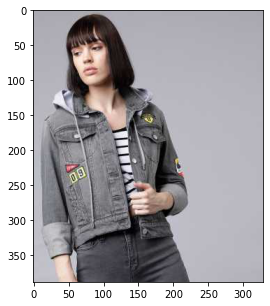

In [44]:
import imageio
import matplotlib.pyplot as plt
pic = imageio.imread('https://rukminim1.flixcart.com/image/329/395/k26h0280/jacket/g/6/q/m-ttjk000814-tokyo-talkies-original-imafhhbqtxa76kf7.jpeg?q=50')
plt.figure(figsize = (5,5))
plt.imshow(pic)

In [45]:
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Height {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (389, 329, 3)
Image Height 389
Image Width 329
Dimension of Image 3


Type of the image shows that the image is in form of an array. Image height and width vary for all images.
Dimension of the image is the size of the array used by the image. In most cases, it is 3 as each matrix is alloted to Red, Green and Blue colors respectively.

In [46]:
print('Image size {}'.format(pic.size)) 
print('Maximum RGB value in this image {}'.format(pic.max())) 
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 383943
Maximum RGB value in this image 255
Minimum RGB value in this image 0


Here we can observe the maximum and minimum values in the image.

In [47]:
print('Value of only R channel {}'.format(pic[ 100, 50, 0])) 
print('Value of only G channel {}'.format(pic[ 100, 50, 1])) 
print('Value of only B channel {}'.format(pic[ 100, 50, 2]))

Value of only R channel 86
Value of only G channel 77
Value of only B channel 80


A specific pixel located at Row : 100 ; Column : 50  denotes each channel's value of R,G,B.

Viewing each channel seperately.
First, set value of R channel=0

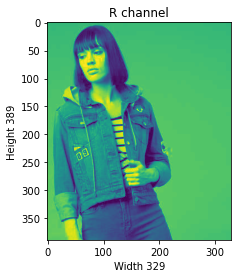

In [48]:
plt.title('R channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 0])
plt.show()

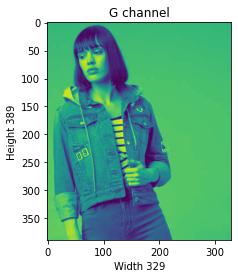

In [49]:
plt.title('G channel')
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 1]) 
plt.show()

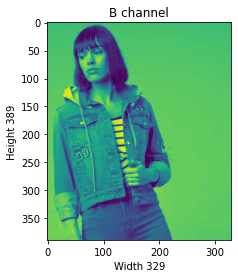

In [50]:
plt.title('B channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 2]) 
plt.show()

The difference is barely noticable but is present.

Lets individually change row intensities to get a clear understanding.

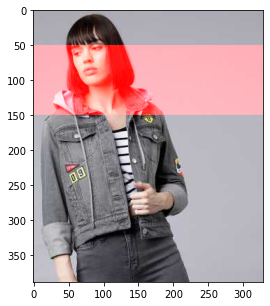

In [51]:
pic[50:150 , : , 0] = 255 # full intensity to those pixel's R channel 
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

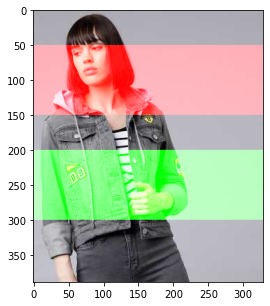

In [52]:
#Note that only the last column changes to change colors
pic[200:300 , : , 1] = 255 # full intensity to those pixel's G channel

plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

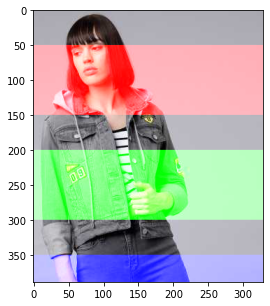

In [53]:
pic[350:, : , 2] = 255 # full intensity to those pixel's G channel

plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

Now, we have all three color intensities set to high (255) for specifically assigned columns.

# Dissecting layers of an image.

From the above observation, it is clear that images are nothing but layers of matrices stacked on top of each other.
Splitting these matrices will result in images of one color (R,G or B).

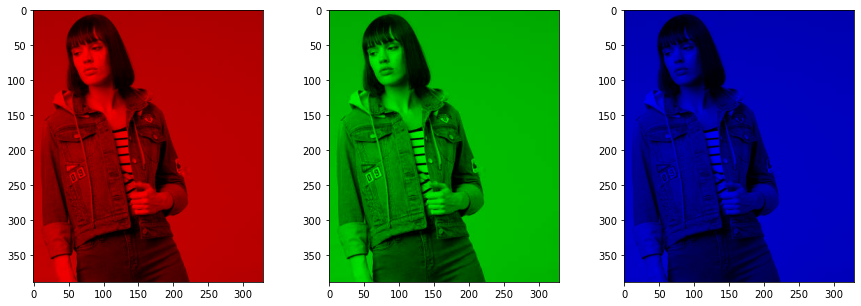

In [54]:
import numpy as np 
pic=imageio.imread('https://rukminim1.flixcart.com/image/329/395/k26h0280/jacket/g/6/q/m-ttjk000814-tokyo-talkies-original-imafhhbqtxa76kf7.jpeg?q=50')
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  
for c, ax in zip(range(3), ax):     
     # create zero matrix        
     split_img = np.zeros(pic.shape, dtype="uint8") 
     # 'dtype' by default: 'numpy.float64'  # assing each channel      
     split_img[ :, :, c] = pic[ :, :, c] # display each channel     
     ax.imshow(split_img)

In [55]:
import numpy as np
import cv2
from scipy.interpolate import interp1d
def brightness( im_file ):
    im = Image.open(im_file).convert('L')
    stat = ImageStat.Stat(im)
    return stat.mean[0]


from skimage import io
import numpy as np

def get(im):
    t=io.imread(im)
    return np.mean(t)


# Analysing footwear image data and comparing brands

In [56]:
footwear_sorted

,Product Name,Price,Original Prices,Discount rates,Brand,img
740,Wigwam Running Shoes For Women,1048,1499,30,Power,https://rukminim1.flixcart.com/image/329/395/j...
691,People White Lace Up Shoes For Women,1079,1799,40,People,https://rukminim1.flixcart.com/image/329/395/k...
684,Women Brown Flats Sandal,121,139,12,Ozzy,https://rukminim1.flixcart.com/image/329/395/j...
754,Slippers,129,299,56,KOM-OPT,https://rukminim1.flixcart.com/image/329/395/k...
155,Women Red Flats Sandal,135,139,2,OZZY,https://rukminim1.flixcart.com/image/329/395/k...
...,...,...,...,...,...,...
165,shoe Casuals For Women,969,999,3,Cassiey,https://rukminim1.flixcart.com/image/329/395/k...
275,shoe Casuals For Women,969,999,3,Cassiey,https://rukminim1.flixcart.com/image/329/395/k...
80,shoe Casuals For Women,969,999,3,Cassiey,https://rukminim1.flixcart.com/image/329/395/k...
390,DREAM Running Shoes For Women,999,1199,16,Campus,https://rukminim1.flixcart.com/image/329/395/k...


In [57]:
footwear_sorted['brightness']=footwear_sorted['img'].apply(lambda x: get(x))

Grouping brands and calculating mean discount rates and average pixel values of images by each brand

In [58]:
grouped = footwear_sorted.groupby('Brand')
g=grouped.aggregate(np.mean)

In [59]:
g_dark=g.sort_values(by='brightness')
g_dark=g_dark.head(10)

In [60]:
g_light=g.sort_values(by='brightness', ascending=False)
g_light=g_light.head(10)

In [61]:
fig = px.bar(g_light, x=g_light.index, y='brightness', color='brightness')
fig.show()

The very popular Asics brand has pixelated images amongst all other brands.

In [62]:
fig = go.Figure(go.Bar(
            x=g_dark.index,
            y=g_dark['brightness']))

fig.show()

Action footwear has the darkest pictures!